
    Implement various data augmentation techniques using Keras
    Implement feature-wise and sample-wise normalization on the data set.
    Define and apply a custom augmentation function that adds random noise to images.
    Display the augmented images to understand the effect of different augmentation techniques.


**Step 1 : Setup the environment**

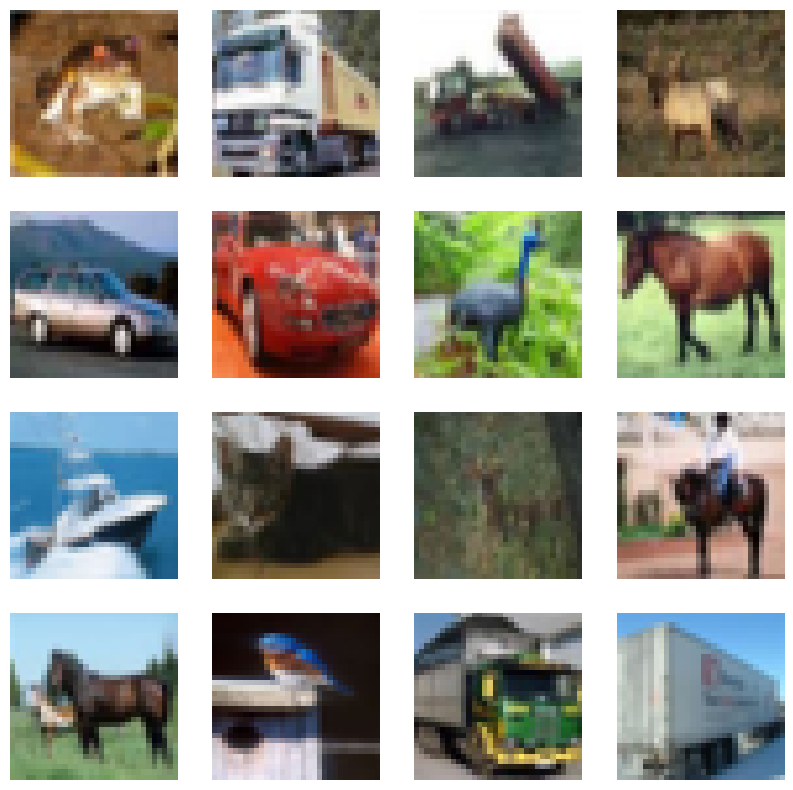

In [ ]:
# Install required libraries
!pip install tensorflow

# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset for training images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel value for augmentation
x_train = x_train.astype('float32') / 255.0
x_test = y_test.astype('float32') / 255.0

# Display a sample of thetraining images
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
plt.show()

Create sample.jpg

In [ ]:
from PIL import Image, ImageDraw

# Create a blank white image
image = Image.new('RGB', (224, 224), color = (255, 255, 255))

# Draw a red square
draw = ImageDraw.Draw(image)
draw.rectangle([(50,50), (174,174)], fill=(255,0,0))

# Save the Image
image.save('sample.jpg')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load a sample image
img_path = 'sample.jpg'
img = load_img(img_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

**Step 2 : Basic Data Augmentation**

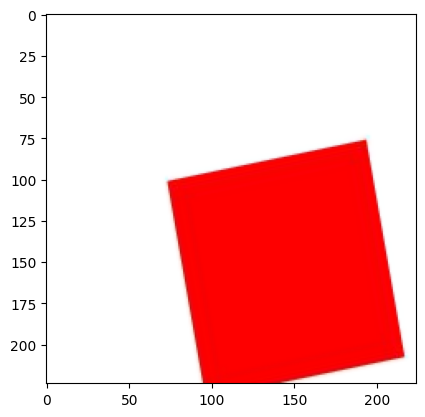

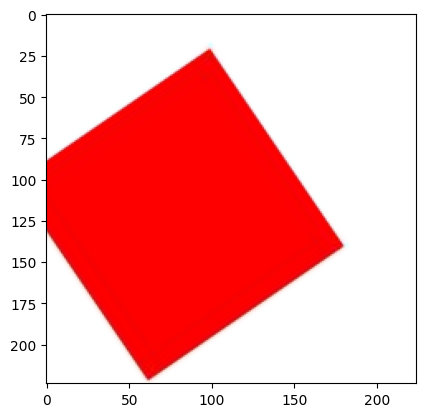

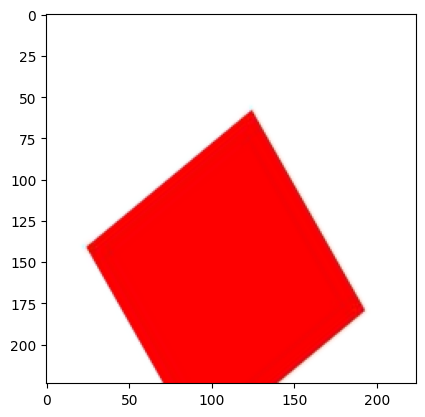

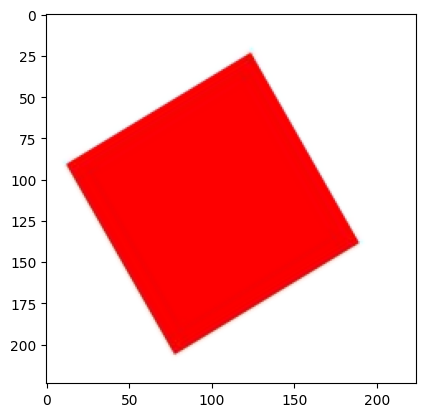

In [ ]:
# Create an instance of ImageDataGenerator with basic Augmentation
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip= True,
    fill_mode='nearest'
)

# Generate batches of augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(batch[0].astype('uint8'))
  i += 1
  if i % 4 == 0:
    break
plt.show()

**Step 3 : Feature-wise and sample-wise normalisation**

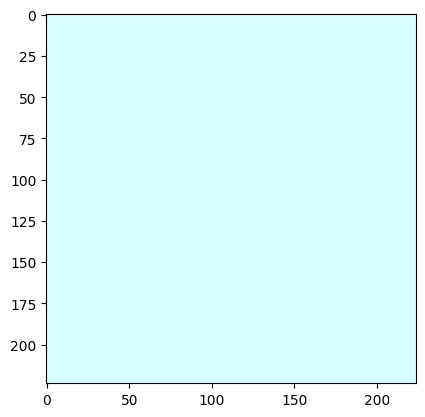

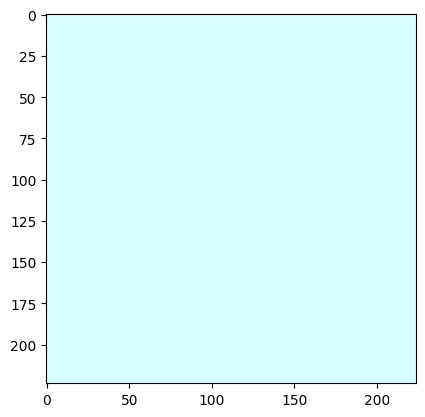

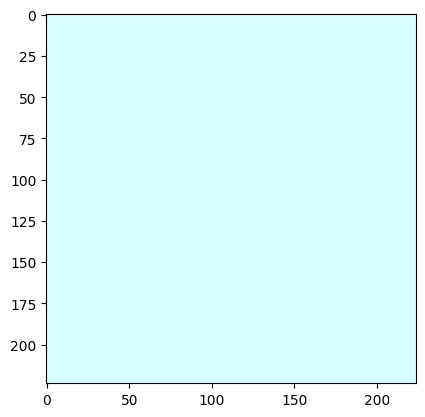

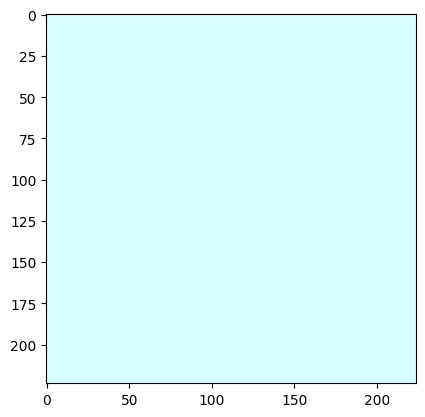

In [ ]:
# Create an instance of ImageDataGenerator with normalisation options
datagen = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True,
    samplewise_center = True,
    samplewise_std_normalization = True
)

# Load the sample image again and fit the generator (normally done on the training set)
datagen.fit(x)

# Generate batches of normalized images
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(batch[0].astype('uint8'))
  i += 1
  if i % 4 == 0 :
    break

plt.show()

**Step 4 : Custom data augmentation function**

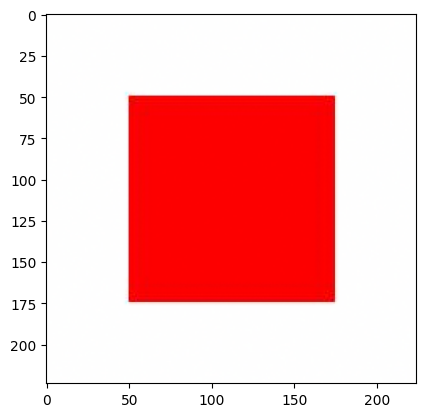

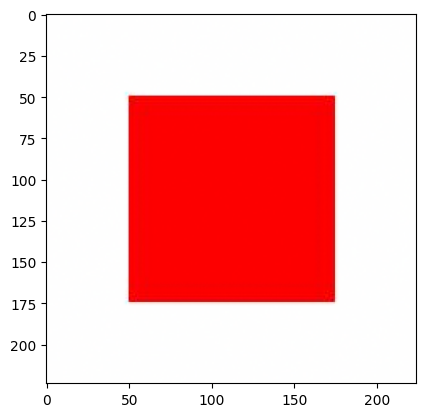

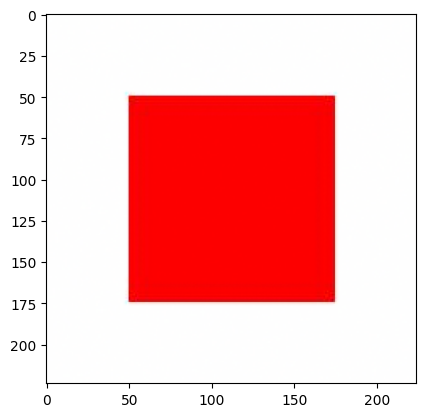

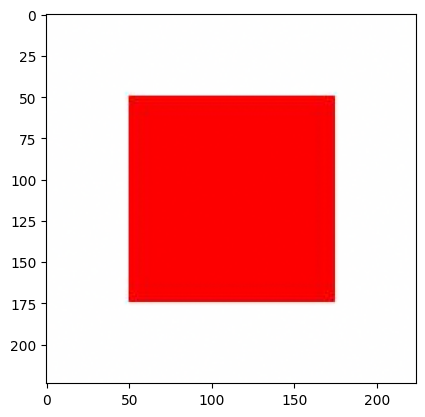

In [ ]:
# Define a custom data augmentation function
def add_random_noise(image):
  noise = np.random.normal(0, 0.1, image.shape)
  return image + noise

# Create an insatnce of ImageDataGenerator with custom augmentation
datagen = ImageDataGenerator(preprocessing_function=add_random_noise)

# Generate batches of augmented images with noise
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(batch[0].astype('uint8'))
  i += 1
  if i % 4 == 0:
    break

plt.show()

**Step 5 : Visualize augmented images**

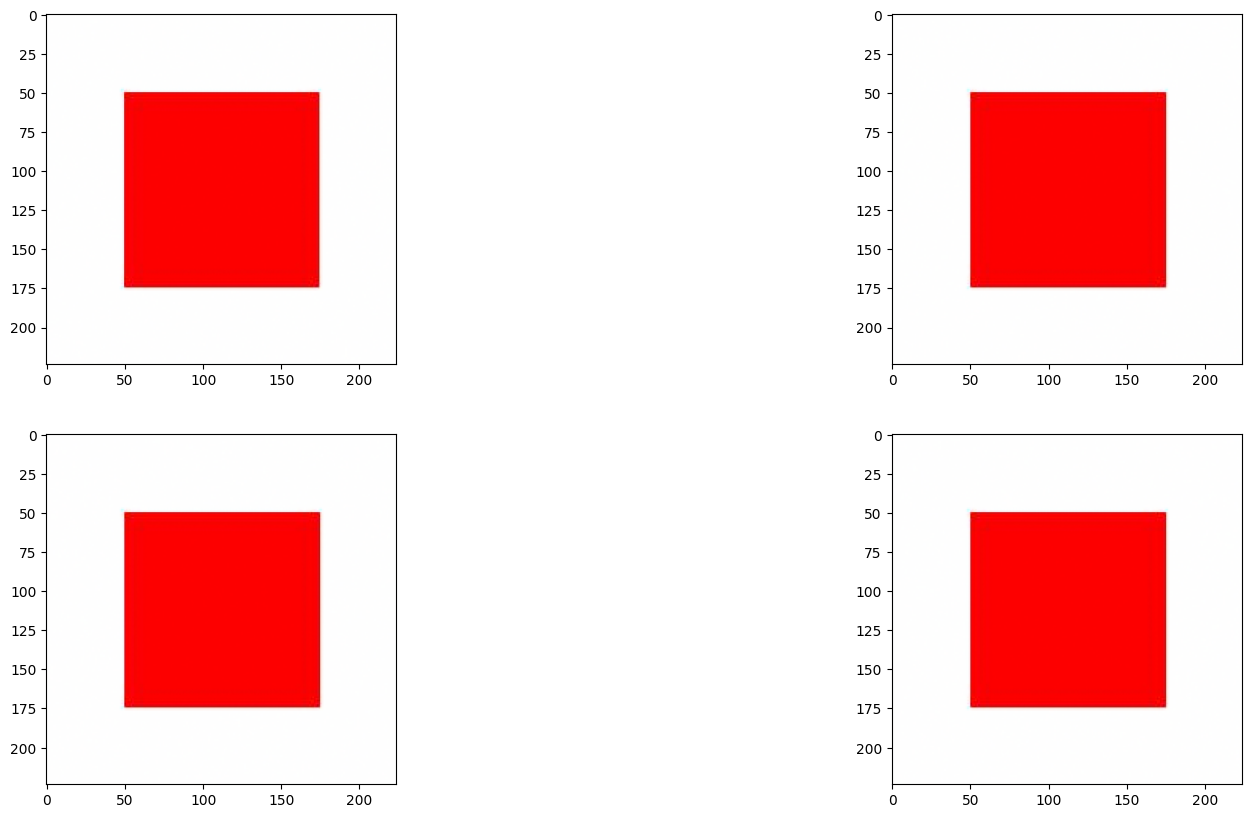

In [ ]:
# Visualise multiple augmented version of the same image
plt.figure(figsize=(20,10))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
  if i >= 4: # Show only 4 versions
    break
  plt.subplot(2,2, i+1)
  plt.imshow(batch[0].astype('uint8'))

plt.show()